Źródło: https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/2.1-a-first-look-at-a-neural-network.ipynb

## Rozpoznawanie pisanych ręcznie cyfr za pomocą sieci neuronowej

W tym przykładzie skorzystamy z populernej biblioteki do nauczania maszynowego: **keras**.

Najpierw instalujemy:
``pip install keras``

Na początku zaimportujmy zbiór danych.
Naszymi danymi będą czarnobiałe grafiki ręcznie narysowanych cyfr, w wymiarze 28x28 pikseli.
Zbiór jest podzielony na dwie części: 60 000 grafk uczących i 10 000 grafik testowych.

In [51]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Zanim będziemy mogli wykorzystać nasze dane, musimy je odpowiednio przygotować.

In [53]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Teraz przyjrzyjmy się dokładniej tym danym.
W tym celu wyświetlimy część zbioru testowego na ekranie.

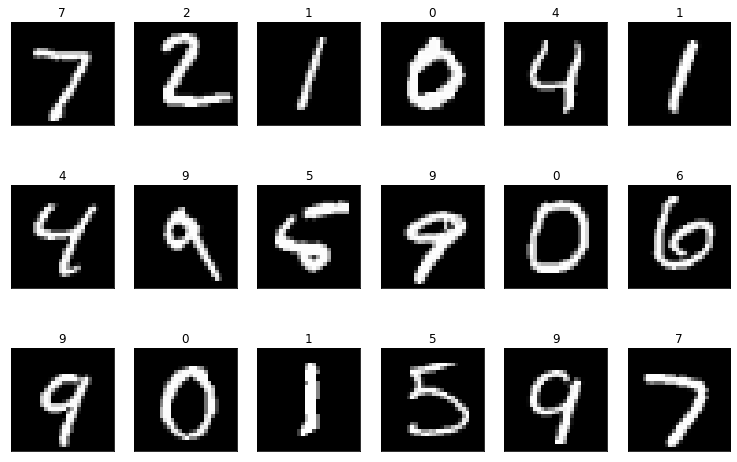

In [60]:
import pylab as pl
import numpy as np

def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    pl.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    pl.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.9, hspace=0.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(np.where(titles[i]==titles[i].max())[0][0], size=12)
        pl.xticks(())
        pl.yticks(())

plot_gallery(test_images, test_labels, 28, 28)

Czas na utworzenie sieci neuronowej i wytrenowanie jej.

In [56]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.4275 - accuracy: 0.8747

Zobaczmy, jak sprawuje się nasza sieć na danych testowych.

In [57]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 869us/step - loss: 0.0676 - accuracy: 0.9797
test_acc: 0.9797000288963318


Osiągneliśmy dokładność około 98%.
Zobaczmy, jak to się przedstawia na konkretnych grafikach.

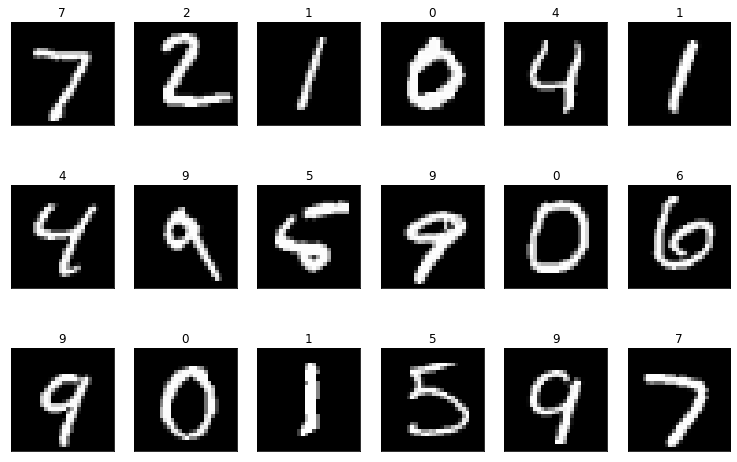

In [58]:
result = network.predict(test_images)
plot_gallery(test_images, result, 28, 28)